# ***Задача 3*** 
***Условие***

Рассматривается система ОДУ, описывающая реакции фотохимии озона в
атмосфере:

\begin{cases}
    c_1' =  k_1c_3 - k_2c_1\\
    c_2' = k_1c_3 - k_3c_2c_4\\
    c_3' = k_3c_2c_4 - k_1c_3\\
    c_4' = k_2c_1 - k_3c_2c_4
\end{cases}

$$\bar c(0) = (0, 0, 5\cdot 10^{11}, 8\cdot 10^{11})$$

где  $𝑐 = (𝑐1 , 𝑐2 , 𝑐3 , 𝑐4 )^𝑇$ – концентрации (кол-во молекул вещества в кубическом сантиметре) $𝑂$, $𝑁𝑂$, $𝑁𝑂_2$ и $𝑂_3$ . Выражения для коэффициентов реакций:

$$𝑘_1 = 10^{-2} max [0, sin(\frac{2 \pi t}{t_d} )] s^{-1} $$
$$𝑘_2 = 10^5 𝑠^{−1} , \quad  𝑘_3 = 10^{−16} cm^3 \cdot molecule^{−1} \cdot s^{−1},  \quad 𝑡_𝑑 = 24 · 60 · 60 s$$

***Решение***

1) Найдем численное решение при помощи НМРК.

На каждой итерации нам нужно будет решать неявное уравнение вида:

$u_k - c_k \cdot f(\tau_k, u_k) \Delta t = \sum\limits_{i=1}^{k - 1} c_i f(\tau_i, u_i) \Delta t$

В коде реализована функция implicit_runge_kutt(a, b, c, n, start, finish, start_val, func)

где a, b, c - параметры таблицы бутчера, n - количества шагов, start, finish - пределы по времени, start_val - начальные данные, func - функция правой части уравнения.

Функция возвращает значения в каждый момент времени с сетки и саму сетку по времени.

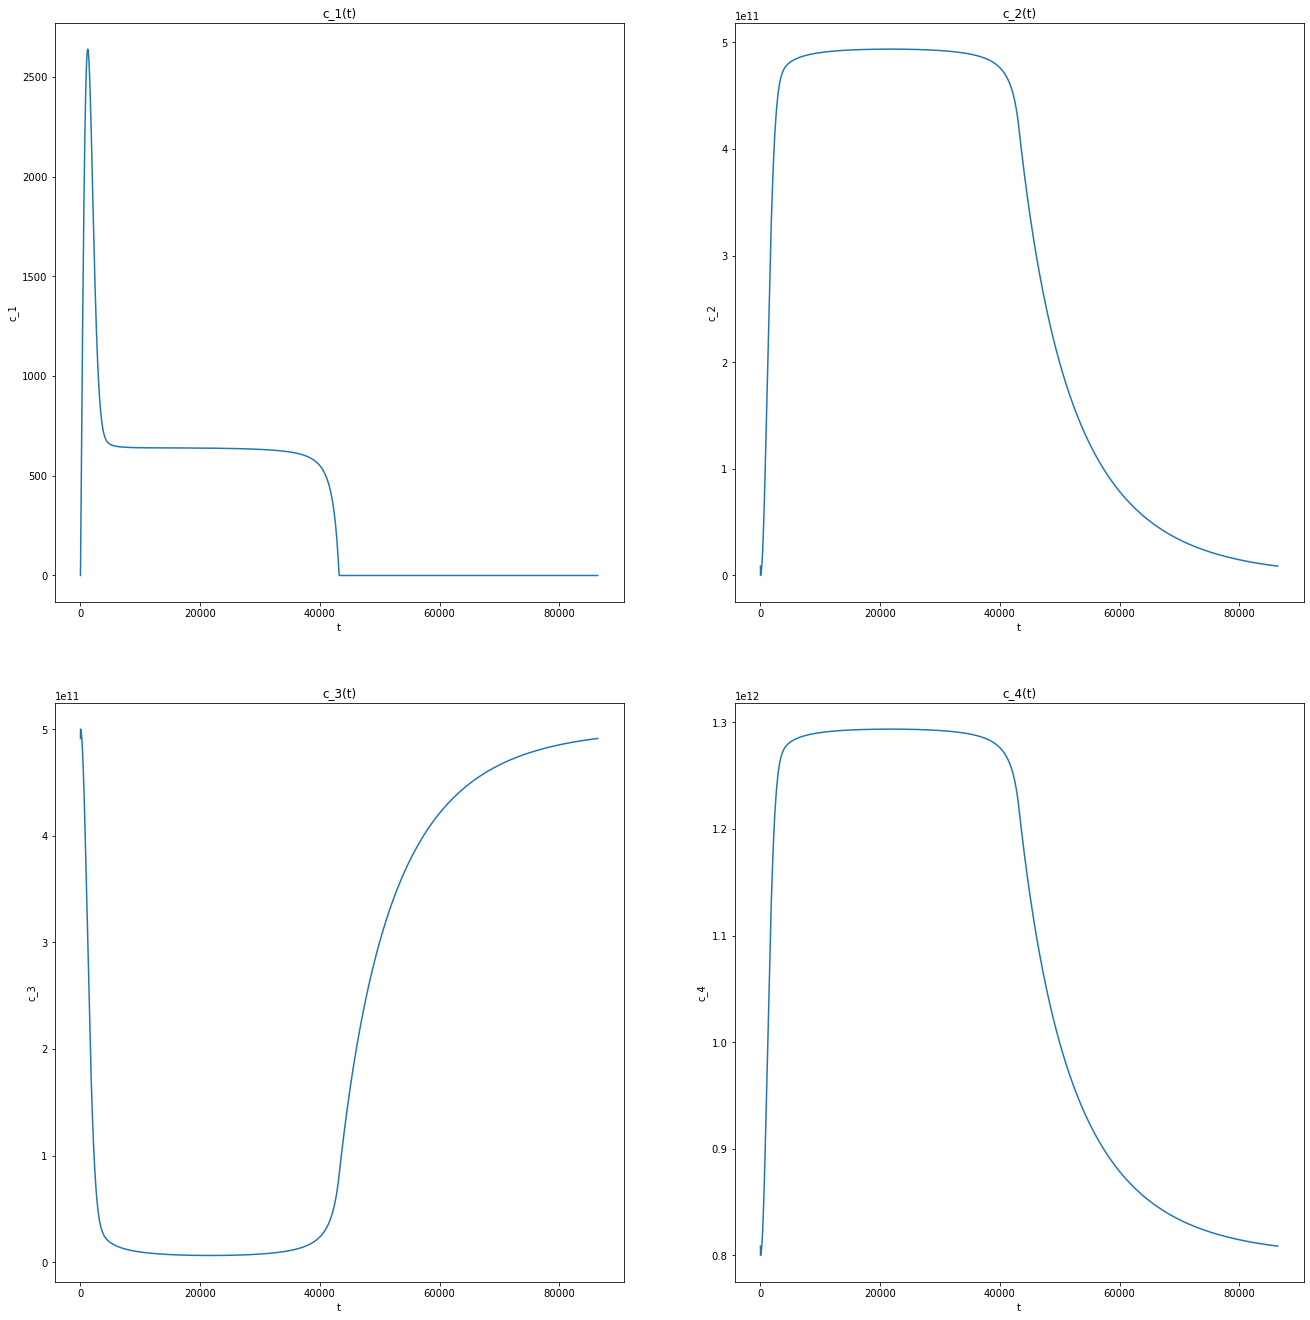

<ipython-input-35-f8de464f9c6a>:66: RuntimeWarning: overflow encountered in double_scalars
  a_3 = k[2]*c[1]*c[3]
<ipython-input-35-f8de464f9c6a>:67: RuntimeWarning: invalid value encountered in double_scalars
  return np.copy(np.array([a_1 - a_2, a_1 - a_3, a_3 - a_1, a_2 - a_3]))


[array([nan, nan, nan, nan]), array([0.e+00, 0.e+00, 5.e+11, 8.e+11]), array([2.71255044e+11, 2.71255044e+11, 2.28744956e+11, 8.00000000e+11]), array([-2.34364353e+19,  5.00209036e+11, -2.09036077e+08,  2.34364366e+19]), array([ 2.02490799e+27, -1.01287684e+18,  1.01287734e+18, -2.02490799e+27]), array([-1.74952048e+35, -1.77204880e+32,  1.77204880e+32,  1.74774843e+35]), array([ 1.51158568e+43,  2.67589052e+54, -2.67589052e+54,  2.67589052e+54]), array([-8.51223306e+54, -6.18657703e+95,  6.18657703e+95, -6.18657703e+95]), array([ 2.27587656e+096, -3.30685073e+178,  3.30685073e+178,
       -3.30685073e+178]), array([1.37642759e+179,            -inf,             inf,            -inf]), array([ inf,  nan,  nan, -inf]), array([nan, nan, nan, nan]), array([nan, nan, nan, nan]), array([nan, nan, nan, nan]), array([nan, nan, nan, nan]), array([nan, nan, nan, nan]), array([nan, nan, nan, nan]), array([nan, nan, nan, nan]), array([nan, nan, nan, nan]), array([nan, nan, nan, nan]), array([nan, 

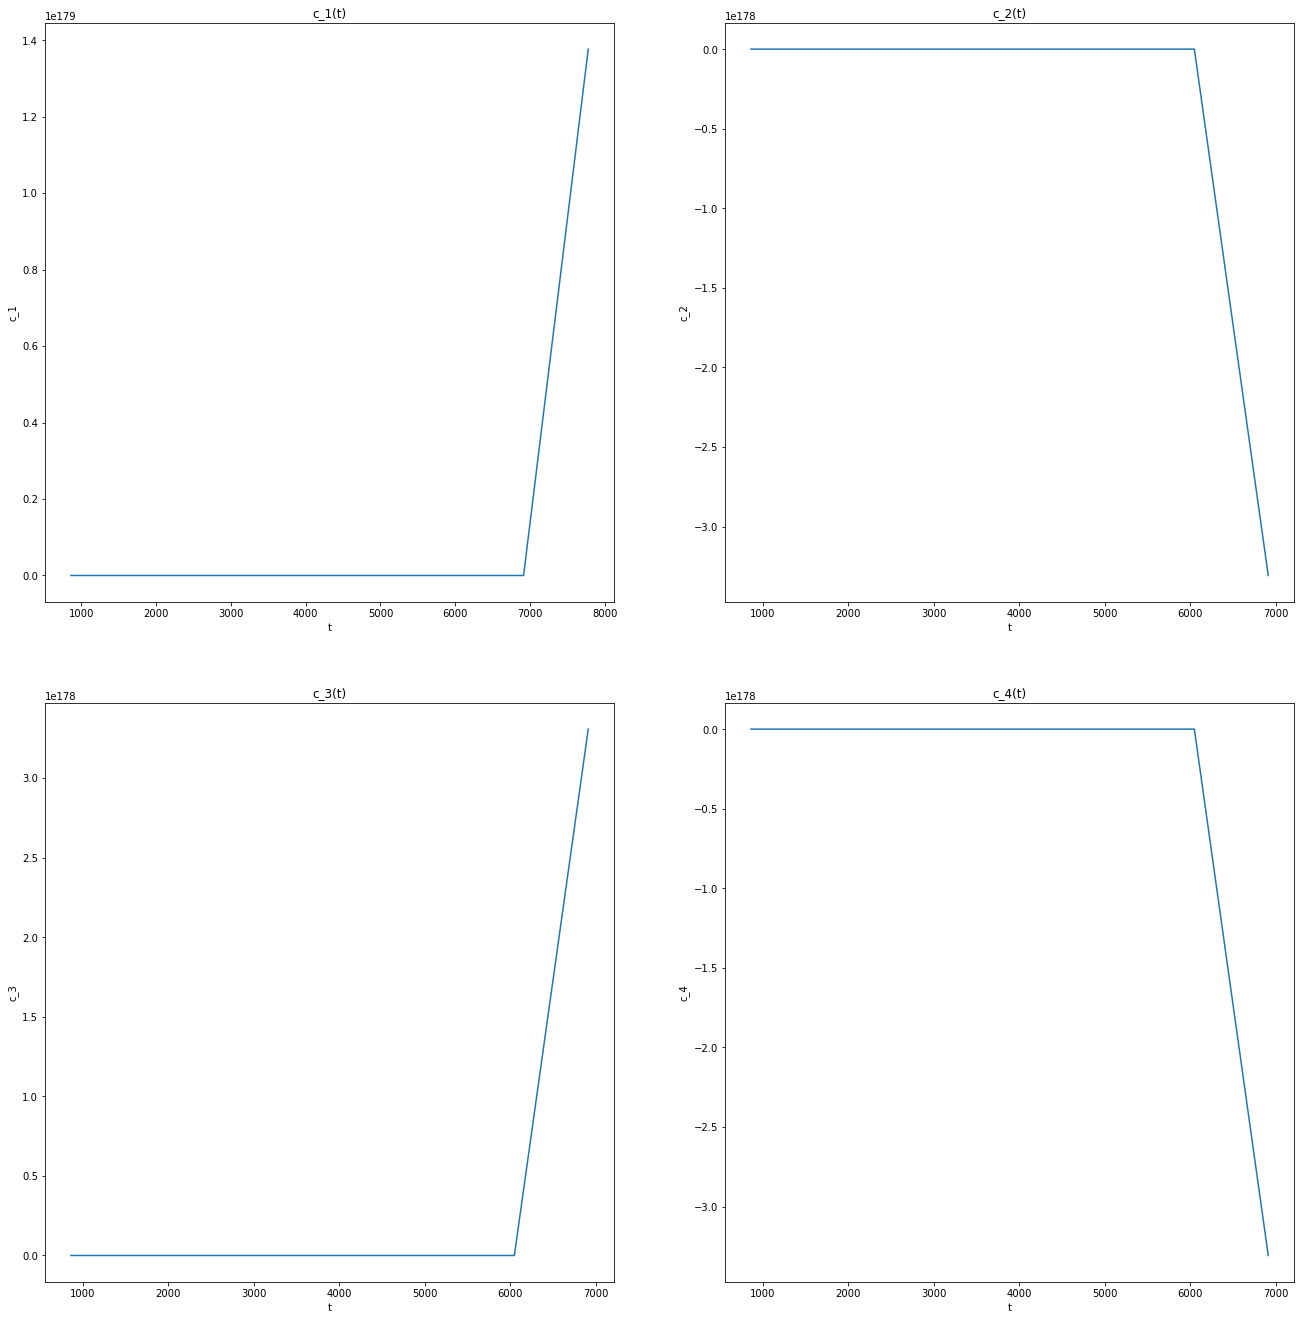

In [35]:
from scipy.optimize import fsolve
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Вспомогательная функция
def scal_prod(x, y):
    if len(x) != len(y):
        raise
    return sum([x[i]*y[i] for i in range(len(x))])


def implicit_runge_kutt(a, b, c, n, start, finish, start_val, func):
    h = (finish - start) / n
    val = np.copy(start_val)
    t = start
    vals = [val]
    time_grid = [0]
    for i in range(n):
        val_mid = [val] # промежуточные значения функции
        t_mid = [t] # промежуточные значения времени
        # РК итерация
        for j in range(1, len(b)):
            t_mid.append(t + c[j] * h)
            right_part = val + h * sum([a[j][k] * func(val_mid[k], t_mid[k]) for k in range(j)])
            def equation(x):
                return x - func(x, t + c[j] * h) * a[j][j] * h - right_part
            slve = fsolve(equation, x0=val)
            val_mid.append(np.copy(slve))
        t += h
        time_grid.append(t)
        dif = [func(val_mid[k], t_mid[k]) for k in range(len(b))]
        val += h * scal_prod(b, dif)
        vals.append(np.copy(val))
    return (vals, time_grid)


def euler_method(n, start, finish, srart_val, func):
    h = (finish - start) / n
    val = np.copy(srart_val)
    vals = [val]
    t = start
    time_grid = [t]
    for i in range(n):
        for j in range(4):
            if np.isnan(val[j]) or math.isinf(abs(val[j])):
                break
        val += h * func(val, t)
        vals.append(np.copy(val))
        t += h
        time_grid.append(t)
    return (vals, time_grid)


def k_1(t):
    return 0.01 * max(0, math.sin(2*math.pi*t/(24*60*60)))

k = [k_1, 10**5, 10**(-16)]

# функция правой части
def func2(c, t):
    a_1 = k[0](t)*c[2]
    a_2 = k[1] * c[0]
    a_3 = k[2]*c[1]*c[3]
    return np.copy(np.array([a_1 - a_2, a_1 - a_3, a_3 - a_1, a_2 - a_3]))

def plot_res(vals, time_grid):
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))  # figsize=(ширина, высота)
    plt.tight_layout(pad=8.0)
    # Построение графиков
    res = []
    for i in range(4):
        res.append([])
        for j in range(len(vals)):
            # if not np.isnan(vals[j][i]) and not math.isinf(abs(vals[j][i])):
            res[i].append(vals[j][i])
    for i in range(2):
        for j in range(2):
            ind = i * 2 + j
            axs[i, j].plot(time_grid, res[ind])
            axs[i, j].set_title(f"c_{ind + 1}(t)")
            axs[i, j].set_xlabel('t')
            axs[i, j].set_ylabel(f"c_{ind + 1}")
    plt.show()

a = [
     [1, 0, 0],
     [0, 1/3, 1],
     [-1/12, 3/4, 1/3]
]
b = [-1/12, 3/4, 1/3]
c = [1, 1/3, 1]

T = 24 * 60 * 60.0
start_val = np.array([0.0, 0.0, 5e11, 8e11], dtype=np.float64)
steps = 10000

vals, time_grid = implicit_runge_kutt(a, b, c, steps, 0, T, start_val, func2)
plot_res(vals, time_grid)

steps = 1000000
vals, time_grid = euler_method(100, 0, T, start_val, func2)
print(vals)
plot_res(vals, time_grid)




Эйлер взрывается при любых шагах.